In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

I will use the two tables that I created using SQL for the Tableau part of the project, since they both include the data I am interested in examining further.

In [3]:
df_1 = pd.read_excel('Tableau 1.xlsx')
df_2 = pd.read_excel('Tableau 2.xlsx')

In [4]:
df_1.dtypes

Country          object
Continent        object
Year              int64
Population        int64
UrbanPop%       float64
MedianAge       float64
Unemployment    float64
dtype: object

In [5]:
df_2.dtypes

Country           object
Continent         object
Year               int64
FertilityRate    float64
dtype: object

For convenience purposes, I will transfer the Fertility Rate column to the first table.

In [6]:
df_1['FertilityRate'] = np.zeros(len(df_1['Year']))

In [7]:
for i in range(len(df_1['Year'])):
    df_1.loc[[i],['FertilityRate']] = df_2[(df_2['Country'] == df_1.iloc[i]['Country']) & (df_2['Year'] == df_1.iloc[i]['Year'])]['FertilityRate'].values[0]

In [8]:
df_1.head()

,Country,Continent,Year,Population,UrbanPop%,MedianAge,Unemployment,FertilityRate
0,Lesotho,Africa,1995,1898598,15.7,18.2,37.34,4.46
1,North Macedonia,Europe,1995,1983252,59.6,30.7,35.60,2.12
2,Algeria,Africa,1995,28757785,56.3,19.4,31.84,4.12
3,South Africa,Africa,1995,41435758,55.3,21.3,29.89,3.51
4,Djibouti,Africa,1995,630388,76.3,18.1,28.94,5.85


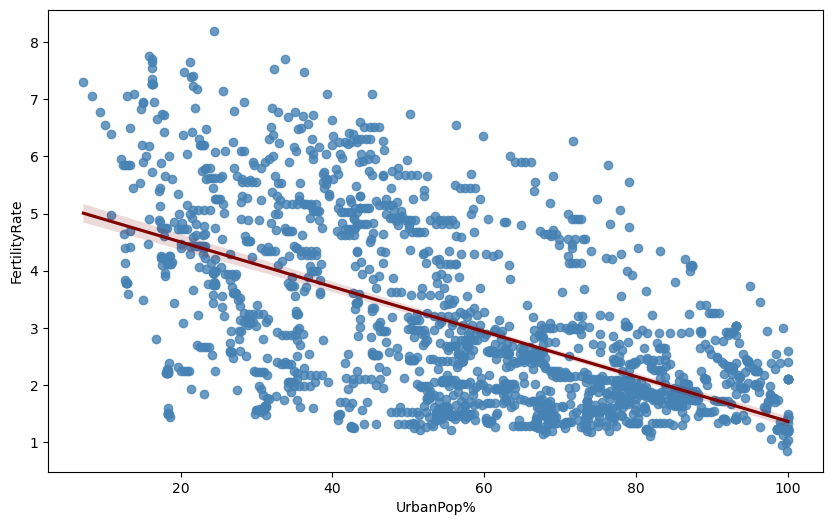

In [9]:
sns.regplot(x='UrbanPop%', y='FertilityRate', data=df_1, scatter_kws={"color":"steelblue"}, line_kws={"color":"maroon"})
plt.show()

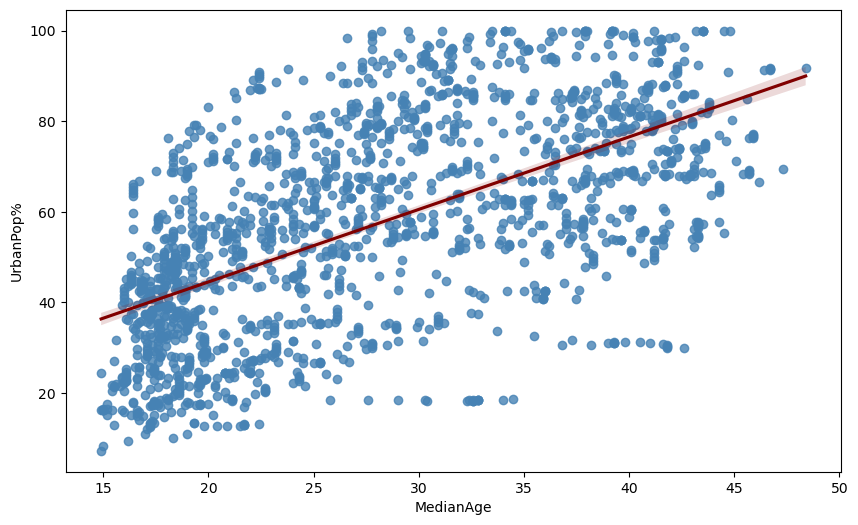

In [10]:
sns.regplot(x='MedianAge', y='UrbanPop%', data=df_1, scatter_kws={"color":"steelblue"}, line_kws={"color":"maroon"})
plt.show()

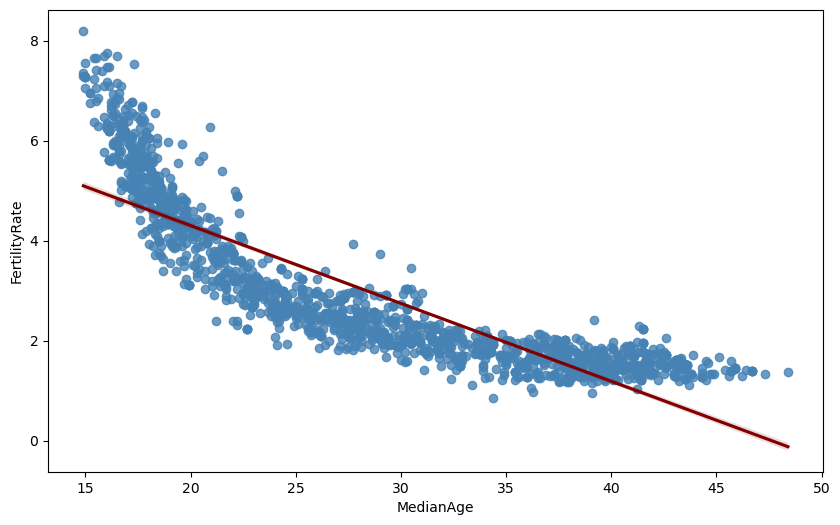

In [11]:
sns.regplot(x='MedianAge', y='FertilityRate', data=df_1, scatter_kws={"color":"steelblue"}, line_kws={"color":"maroon"})
plt.show()

So far we can see that the relationship between median age and fertility rate does not appear to be linear. I did not include the graphs that showed virtually no possible correlation between the parameters, so we are interested just in these three.

In [19]:
df_numerized = df_1.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,Country,Continent,Year,Population,UrbanPop%,MedianAge,Unemployment,FertilityRate
0,92,0,1995,1898598,15.7,18.2,37.34,4.46
1,122,2,1995,1983252,59.6,30.7,35.60,2.12
2,2,0,1995,28757785,56.3,19.4,31.84,4.12
3,150,0,1995,41435758,55.3,21.3,29.89,3.51
4,45,0,1995,630388,76.3,18.1,28.94,5.85


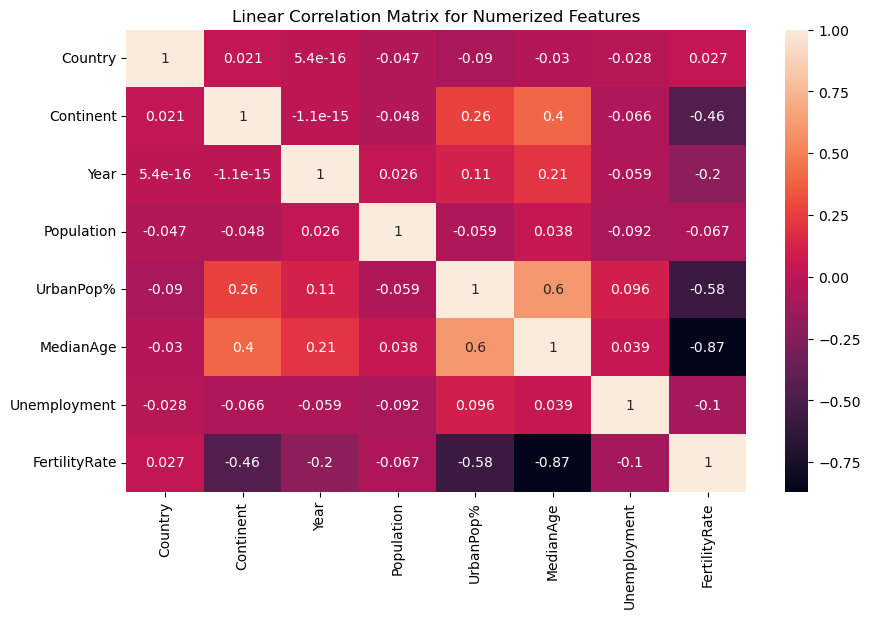

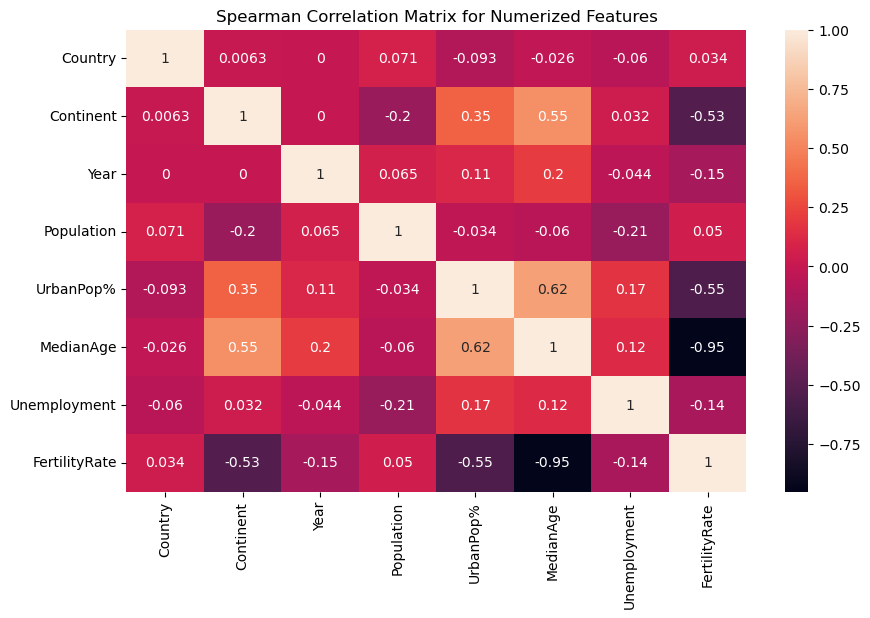

In [20]:
corr_matrix = df_numerized.corr("pearson", numeric_only=True)
corr_matrix2 = df_numerized.corr("spearman", numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.title('Linear Correlation Matrix for Numerized Features')
plt.show()
sns.heatmap(corr_matrix2, annot=True)
plt.title('Spearman Correlation Matrix for Numerized Features')
plt.show()

In [21]:
corr_pairs = corr_matrix.unstack()
sorted_pairs = corr_pairs.sort_values()
corr_pairs2 = corr_matrix2.unstack()
sorted_pairs2 = corr_pairs2.sort_values()

Linear high correlation:

In [26]:
high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]
high_corr

UrbanPop%  MedianAge    0.604267
MedianAge  UrbanPop%    0.604267
dtype: float64

In [28]:
low_corr = sorted_pairs[(sorted_pairs) < -0.5]
low_corr

MedianAge      FertilityRate   -0.868924
FertilityRate  MedianAge       -0.868924
UrbanPop%      FertilityRate   -0.580760
FertilityRate  UrbanPop%       -0.580760
dtype: float64

High correlation (Spearman):

In [27]:
high_corr2 = sorted_pairs2[(sorted_pairs2 > 0.5) & (sorted_pairs2 < 1)]
high_corr2

MedianAge  Continent    0.549498
Continent  MedianAge    0.549498
MedianAge  UrbanPop%    0.624020
UrbanPop%  MedianAge    0.624020
dtype: float64

In [29]:
low_corr2 = sorted_pairs2[(sorted_pairs2) < -0.5]
low_corr2

MedianAge      FertilityRate   -0.951026
FertilityRate  MedianAge       -0.951026
UrbanPop%      FertilityRate   -0.552666
FertilityRate  UrbanPop%       -0.552666
Continent      FertilityRate   -0.529323
FertilityRate  Continent       -0.529323
dtype: float64

The numbers show that there is a correlation between the three parameters I examined through scatter plots: urban population %, median age and fertility rate (especially high negative correlation between median age and fertility rate). There is also some correlation between continent and median age.